In [3]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [9]:
def create_circular_mask(x, y, r, index, image, material):
    
    h,w = image.shape
    
    scale = 8
    
    center = [x*int(w/2)/scale + int(w/2),y*int(h/2)/scale + int(h/2)]

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if r is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= r*int(w/2)/scale
    
    
    image[mask] = index

In [10]:
    
def create_circular_mask(x, y, r, index, image, material):
    
    Insert = 'Insert' + str(index)
    
    topas_string = f'''
s:Ge/{Insert}/Type     = "TsCylinder"
s:Ge/{Insert}/Parent = "InsertGroup"
b:Ge/{Insert}/IsParallel = "True"
s:Ge/{Insert}/ParallelWorldName = "Inserts"
s:Ge/{Insert}/Material = "{material}"
d:Ge/{Insert}/RMin = 0.0 cm
d:Ge/{Insert}/RMax = {r} cm
d:Ge/{Insert}/HL = 10. cm #3 mm long
d:Ge/{Insert}/SPhi = 0. deg
d:Ge/{Insert}/DPhi = 360. deg
d:Ge/{Insert}/TransX = 0. cm
d:Ge/{Insert}/TransY = {y} cm
d:Ge/{Insert}/TransZ = {x} cm
d:Ge/{Insert}/RotX = 0. deg
d:Ge/{Insert}/RotY = 90. deg
d:Ge/{Insert}/RotZ = 0. deg
'''
    
    with open('/home/xcite/topas/Catphan_dose/inserts.txt','a') as f:
        
        f.write(topas_string)

In [11]:
f = open('/home/xcite/topas/Catphan_dose/inserts.txt','w')

f.write('''
s:Ge/InsertGroup/Type="Group"
s:Ge/InsertGroup/Parent = "World"
d:Ge/InsertGroup/TransX=0. m
d:Ge/InsertGroup/TransY=0. m
d:Ge/InsertGroup/TransZ=0. m
d:Ge/InsertGroup/RotX=0. deg
d:Ge/InsertGroup/RotY=0. deg


d:Tf/TimelineEnd = 360. ms
i:Tf/NumberOfSequentialTimes = 360
s:Tf/beam_energy/Function = "Step"
dv:Tf/beam_energy/Times = 360 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 ms
dv:Tf/beam_energy/Values = 360 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 deg

''')

f.close()

In [10]:
# im = np.zeros([512,512])
im = np.zeros([256,256])
ii = 1

# CTMAT(x) formel=H2O dichte=x
LEN = 100

A0  = 87.7082*np.pi/180
A1 = 108.3346*np.pi/180
A2 = 126.6693*np.pi/180
A3 = 142.7121*np.pi/180
A4 = 156.4631*np.pi/180
A5 = 167.9223*np.pi/180
A6 = 177.0896*np.pi/180
A7 = 183.9651*np.pi/180
A8 = 188.5487*np.pi/180

B0 = 110.6265*np.pi/180
B1 = 142.7121*np.pi/180
B2 = 165.6304*np.pi/180
B3 = 179.3814*np.pi/180

m = "G4_LUNG_ICRP"

# Phantom 
# ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
create_circular_mask(x= 0.000,  y= 0.000,  r=10.0, index = ii, image = im, material = m); ii += 1

ii += 1

m = "G4_LUNG_ICRP"

# ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
create_circular_mask(x= 5*cos(A0),  y= 5*sin(A0),  r=0.75, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A1),  y= 5*sin(A1),  r=0.45, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A2),  y= 5*sin(A2),  r=0.40, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A3),  y= 5*sin(A3),  r=0.35, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A4),  y= 5*sin(A4),  r=0.30, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A5),  y= 5*sin(A5),  r=0.25, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A6),  y= 5*sin(A6),  r=0.20, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A7),  y= 5*sin(A7),  r=0.15, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A8),  y= 5*sin(A8),  r=0.10, index = ii, image = im, material = m); ii += 1
m = "G4_BONE_COMPACT_ICRU"
ii += 1

# ++++ supra-slice 0.3% targets +++++++++++++++++++++++++++++++++++++++ */
create_circular_mask(x= 5*cos(A0+2/3*np.pi),  y= 5*sin(A0+2/3*np.pi),  r=0.75, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A1+2/3*np.pi),  y= 5*sin(A1+2/3*np.pi),  r=0.45, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A2+2/3*np.pi),  y= 5*sin(A2+2/3*np.pi),  r=0.40, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A3+2/3*np.pi),  y= 5*sin(A3+2/3*np.pi),  r=0.35, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A4+2/3*np.pi),  y= 5*sin(A4+2/3*np.pi),  r=0.30, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A5+2/3*np.pi),  y= 5*sin(A5+2/3*np.pi),  r=0.25, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A6+2/3*np.pi),  y= 5*sin(A6+2/3*np.pi),  r=0.20, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A7+2/3*np.pi),  y= 5*sin(A7+2/3*np.pi),  r=0.15, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A8+2/3*np.pi),  y= 5*sin(A8+2/3*np.pi),  r=0.10, index = ii, image = im, material = m); ii += 1
m = "G4_BONE_CORTICAL_ICRP"
ii += 1

# ++++ supra-slice 0.5% targets +++++++++++++++++++++++++++++++++++++++ */
create_circular_mask(x= 5*cos(A0+4/3*np.pi),  y= 5*sin(A0+4/3*np.pi),  r=0.75, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A1+4/3*np.pi),  y= 5*sin(A1+4/3*np.pi),  r=0.45, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A2+4/3*np.pi),  y= 5*sin(A2+4/3*np.pi),  r=0.40, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A3+4/3*np.pi),  y= 5*sin(A3+4/3*np.pi),  r=0.35, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A4+4/3*np.pi),  y= 5*sin(A4+4/3*np.pi),  r=0.30, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A5+4/3*np.pi),  y= 5*sin(A5+4/3*np.pi),  r=0.25, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A6+4/3*np.pi),  y= 5*sin(A6+4/3*np.pi),  r=0.20, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A7+4/3*np.pi),  y= 5*sin(A7+4/3*np.pi),  r=0.15, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 5*cos(A8+4/3*np.pi),  y= 5*sin(A8+4/3*np.pi),  r=0.10, index = ii, image = im, material = m); ii += 1
m = "G4_ADIPOSE_TISSUE_ICRP"
ii += 1

# ++++ subslice 1.0% targets 7mm long +++++++++++++++++++++++++++++++++ */
create_circular_mask(x= 2.5*cos(B0),  y= 2.5*sin(B0),  r=0.45, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 2.5*cos(B1),  y= 2.5*sin(B1),  r=0.35, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 2.5*cos(B2),  y= 2.5*sin(B2),  r=0.25, index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 2.5*cos(B3),  y= 2.5*sin(B3),  r=0.15, index = ii, image = im, material = m); ii += 1
m = "G4_BRAIN_ICRP"
ii += 1

# ++++ subslice 1.0% targets 3mm long +++++++++++++++++++++++++++++++++ */
create_circular_mask(x= 2.5*cos(B0+2/3*np.pi) ,y= 2.5*sin(B0+2/3*np.pi),  r=0.45  , index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 2.5*cos(B1+2/3*np.pi) ,y= 2.5*sin(B1+2/3*np.pi),  r=0.35  , index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 2.5*cos(B2+2/3*np.pi) ,y= 2.5*sin(B2+2/3*np.pi),  r=0.25  , index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 2.5*cos(B3+2/3*np.pi) ,y= 2.5*sin(B3+2/3*np.pi),  r=0.15  , index = ii, image = im, material = m); ii += 1
m = "G4_B-100_BONE"
ii += 1

# ++++ subslice 1.0% targets 5mm long +++++++++++++++++++++++++++++++++ */
create_circular_mask(x= 2.5*cos(B0+4/3*np.pi) ,y= 2.5*sin(B0+4/3*np.pi),  r=0.45  , index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 2.5*cos(B1+4/3*np.pi) ,y= 2.5*sin(B1+4/3*np.pi),  r=0.35  , index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 2.5*cos(B2+4/3*np.pi) ,y= 2.5*sin(B2+4/3*np.pi),  r=0.25  , index = ii, image = im, material = m); ii += 1
create_circular_mask(x= 2.5*cos(B3+4/3*np.pi) ,y= 2.5*sin(B3+4/3*np.pi),  r=0.15  , index = ii, image = im, material = m); ii += 1
 

<IPython.core.display.Javascript object>


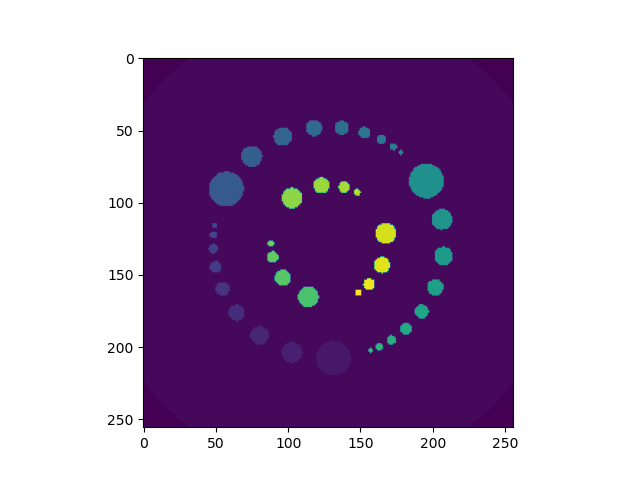

In [11]:
plt.figure()
plt.imshow(im)